## Get timestamps

In [1]:
import re

file = open("results/phase2_final_400000ops_1_1000_stderr", "r")
lines = list(map(lambda line: line.rstrip('\n'), file.readlines()))

In [2]:
# Remove everything before "Starting test"
def get_line_with_find(lines, regex):
    for index, line in enumerate(lines):
        if line.find(regex) != -1:
            return index
    return -1


body_index = get_line_with_find(lines, 'Starting test.')

body = lines[body_index + 1:]


In [12]:

# Get only data lines
regex_pattern = re.compile(
    "^[0-9]{4}-(0[1-9]|1[0-2])-(0[1-9]|[1-2][0-9]|3[0-1]) (2[0-3]|[01][0-9]):[0-5][0-9]:[0-5][0-9]:[0-9]{3}")
data_lines = list(filter(regex_pattern.match, body))



In [13]:

# Get first and last line
first_line = data_lines[0]
last_line = data_lines[-1]

In [14]:

# Parse the timestamps
start_time_string = first_line.split()[0] + ' ' + first_line.split()[1][:12]
end_time_string = last_line.split()[0] + ' ' + last_line.split()[1][:12]

In [15]:

# Print
print(start_time_string)
print(end_time_string)

#if start_time_string < end_time_string:
#    print('this')

2019-11-13 10:38:03:003
2019-11-13 10:44:47:758


## Getting the jolokia files

In [7]:
import pandas as pd

metrics_df_node1 = pd.read_csv("results/state_100.0.0.11_1_1000", parse_dates=True, infer_datetime_format=True, skipinitialspace=True)

metrics_df_node1.head()

,Timestamp,MemoryUsed,ReadLatency1,ReadCount,WriteLatency1,WriteCount,PendingTasks,WaitingOnCommit1,Unnamed: 8
0,2019-11-13 10:38:06.028,543521312,93.972516,313816,35.992548,59737,0,0.0,NaN
1,2019-11-13 10:38:07.113,550861344,94.070660,314084,33.562494,59755,0,0.0,NaN
2,2019-11-13 10:38:08.174,557152800,94.070660,314327,33.562494,59768,0,0.0,NaN
3,2019-11-13 10:38:09.258,562395680,94.070660,314561,33.562494,59779,0,0.0,NaN
4,2019-11-13 10:38:10.323,569735712,94.070660,314810,33.562494,59796,0,0.0,NaN


### Filter out rows that are before or after the benchmark

In [8]:
in_benchmark = (metrics_df_node1['Timestamp'] > start_time_string) & (metrics_df_node1['Timestamp'] < end_time_string)
metrics_df_node1 = metrics_df_node1[in_benchmark]

### Calculate throughput

In [9]:
metrics_df_node1['ReadThroughput'] = metrics_df_node1['ReadCount'] - metrics_df_node1['ReadCount'].shift(1)
metrics_df_node1['WriteThroughput'] = metrics_df_node1['WriteCount'] - metrics_df_node1['WriteCount'].shift(1)

metrics_df_node1.head()

,Timestamp,MemoryUsed,ReadLatency1,ReadCount,WriteLatency1,WriteCount,PendingTasks,WaitingOnCommit1,Unnamed: 8,ReadThroughput,WriteThroughput
0,2019-11-13 10:38:06.028,543521312,93.972516,313816,35.992548,59737,0,0.0,NaN,NaN,NaN
1,2019-11-13 10:38:07.113,550861344,94.070660,314084,33.562494,59755,0,0.0,NaN,268.0,18.0
2,2019-11-13 10:38:08.174,557152800,94.070660,314327,33.562494,59768,0,0.0,NaN,243.0,13.0
3,2019-11-13 10:38:09.258,562395680,94.070660,314561,33.562494,59779,0,0.0,NaN,234.0,11.0
4,2019-11-13 10:38:10.323,569735712,94.070660,314810,33.562494,59796,0,0.0,NaN,249.0,17.0


### Plot the data

In [10]:
from matplotlib import pyplot as plt
import numpy as np
import math

%matplotlib inline

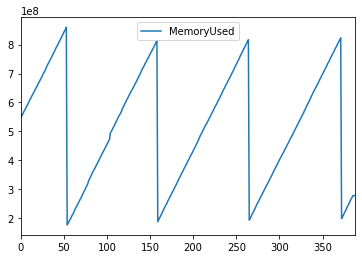

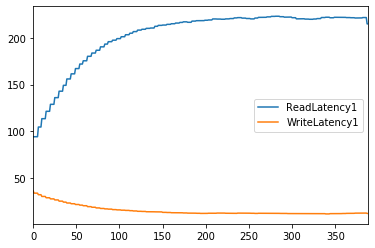

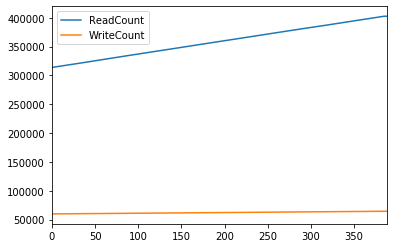

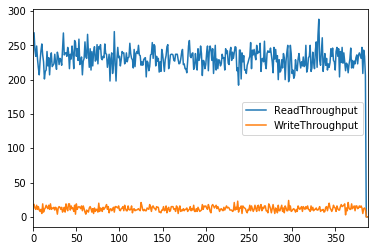

In [11]:
# plt.figure()
# plt.plot(metrics_df_node1['Timestamp'], metrics_df_node1['MemoryUsed'])

metrics_df_node1.plot(kind='line', y='MemoryUsed')
plt.show()

ax = plt.gca()
metrics_df_node1.plot(kind='line', y='ReadLatency1', ax=ax)
metrics_df_node1.plot(kind='line', y='WriteLatency1', ax=ax)
plt.show()

ax = plt.gca()
metrics_df_node1.plot(kind='line', y='ReadCount', ax=ax)
metrics_df_node1.plot(kind='line', y='WriteCount', ax=ax)
plt.show()

ax = plt.gca()
metrics_df_node1.plot(kind='line', y='ReadThroughput', ax=ax)
metrics_df_node1.plot(kind='line', y='WriteThroughput', ax=ax)
plt.show()